In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn's Linear Regression

In [2]:
state = 4

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.metrics import mean_squared_error

In [4]:
housing = pl.read_csv("Housing.csv")
housing.head()

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
i64,i64,i64,i64,i64,str,str,str,str,str,i64,str,str
13300000,7420,4,2,3,"""yes""","""no""","""no""","""no""","""yes""",2,"""yes""","""furnished"""
12250000,8960,4,4,4,"""yes""","""no""","""no""","""no""","""yes""",3,"""no""","""furnished"""
12250000,9960,3,2,2,"""yes""","""no""","""yes""","""no""","""no""",2,"""yes""","""semi-furnished"""
12215000,7500,4,2,2,"""yes""","""no""","""yes""","""no""","""yes""",3,"""yes""","""furnished"""
11410000,7420,4,1,2,"""yes""","""yes""","""yes""","""no""","""yes""",2,"""no""","""furnished"""


In [5]:
categorical_cols = housing.select(pl.col(pl.String)).columns

encoder = OneHotEncoder()
encoded_array = encoder.fit_transform(housing[categorical_cols]).toarray().astype('int64')
encoder_features = encoder.get_feature_names_out().tolist()

housing_cat = pl.DataFrame(
    encoded_array,
    schema=encoder_features
).with_row_index(name="index")

housing_cat.head()

index,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
u32,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0


In [6]:
housing_int = housing.clone().select(pl.col(pl.Int64)).with_row_index(name="index")
housing_int.head()

index,price,area,bedrooms,bathrooms,stories,parking
u32,i64,i64,i64,i64,i64,i64
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [7]:
housing_df = housing_int.join(
    other=housing_cat,
    on="index", 
    how="left" 
)

In [8]:
# Splitting data
x = housing_df[:, 2:].to_numpy()
y = housing_df[:, 0].to_numpy().reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=state)

In [9]:
# Standardisation
x_scaler = StandardScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
# Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train_scaled)

# Cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=state)

# Applying the linear regression model on each fold
cv_results = cross_validate(
    lin_reg, 
    x_train_scaled, y_train_scaled,
    scoring="neg_mean_squared_error", 
    cv=cv,
    return_estimator=True
)

# Identify which fold produced the best score
best_fold_idx = cv_results['test_score'].round(3).argmax()

# Get the fitted model corresponding to the best fold
best_estimator = cv_results['estimator'][best_fold_idx]

# Extract the results
coefficients_scaled = best_estimator.coef_[0]
intercept_scaled = best_estimator.intercept_[0]
mse = -(cv_results['test_score'][best_fold_idx])

# Intercept
intercept_reshaped = intercept_scaled.reshape(1, -1)
intercept = y_scaler.inverse_transform(intercept_reshaped)[0, 0].round(2)

# Coefficients
coefficients_reshaped = coefficients_scaled.reshape(1, -1)
coefficients = x_scaler.inverse_transform(coefficients_reshaped)[0].round(3)

## Final Results
np.set_printoptions(suppress=True, precision=3)

print("### Best Fold Results ###")
print(f"Score (MSE): {mse.round(3)}")
print(f"Intercept: {intercept.round(3):,}")
print(f"Coefficients: {coefficients.round(2)}")

### Best Fold Results ###
Score (MSE): 0.254
Intercept: 269.75
Coefficients: [4554.13    2.92    1.2     1.58    0.55    0.15    0.85    0.84    0.16
    0.7     0.3     0.96    0.04    0.72    0.28    0.79    0.21    0.24
    0.36    0.39]


In [11]:
y_pred_test = best_estimator.predict(x_test_scaled)

final_mse = mean_squared_error(y_test_scaled, y_pred_test)
final_r2_score = best_estimator.score(x_test_scaled, y_test_scaled)

print(f"Final test MSE: {final_mse:.4f}")
print(f"Final test R-squared score: {final_r2_score:.4f}")

Final test MSE: 0.3492
Final test R-squared score: 0.6392


# PyTorch's Linear Neural Network

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import ParameterGrid

device = 'mps' if torch.mps.is_available() else 'cpu'

print(f"Device: {device}")

Device: cpu


In [13]:
housing_df.head()

index,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
u32,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0


In [14]:
X = housing_df[:, 2:].to_numpy()
Y = housing_df[:, 1].to_numpy().reshape(-1, 1)

X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.25, random_state=state)

In [ ]:
nrows = X_val_test.shape[0]
test_indices = np.arange(nrows) 

np.random.seed(1)
np.random.shuffle(test_indices)

test_val_split = round(nrows * 0.50)
val_idx = test_indices[:test_val_split] 
test_idx = test_indices[test_val_split:] 

X_test, Y_test = X_val_test[test_idx], Y_val_test[test_idx]
X_val, Y_val = X_val_test[val_idx], Y_val_test[val_idx]

In [16]:
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)

X_val_scaled = X_scaler.transform(X_val)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)

X_test_scaled = X_scaler.transform(X_test)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

Y_scaler = StandardScaler()
Y_train_scaled = Y_scaler.fit_transform(Y_train)
Y_train_tensor = torch.tensor(Y_train_scaled, dtype=torch.float32)

Y_val_scaled = Y_scaler.transform(Y_val)
Y_val_tensor = torch.tensor(Y_val_scaled, dtype=torch.float32)

Y_test_scaled = Y_scaler.transform(Y_test)
Y_test_tensor = torch.tensor(Y_test_scaled, dtype=torch.float32)

In [ ]:
training_data = TensorDataset(X_train_tensor, Y_train_tensor)
validation_data = TensorDataset(X_val_tensor, Y_val_tensor)

In [18]:
# Designing model architecture
class LinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()  # Inherit constructor from parent class (nn.Module) to initialise the parent class

        # Build sequential layer
        self.sequential_layer = nn.Sequential(
            nn.Dropout(p=0.5),  # 50% of the input features will be randomly set to zero
            nn.Linear(input_size, 10),  # Linear layer 1
            nn.ReLU(),  # Rectified linear unit (activation function)
            nn.Linear(10, output_size),  # Linear layer 2
        )

    # The forward pass simply calls the sequential container
    def forward(self, x):
        return self.sequential_layer(x)

In [ ]:
class ModelTrainer:
    # Initialise trainer with the core components
    def __init__(self, model, loss_criterion, optimiser):
        self.model = model
        self.loss_criterion = loss_criterion
        self.optimiser = optimiser

    # Behaviours within a singular training step
    def training_step(self, x, y):
        # Set model to training mode
        self.model.train()

        # Forward pass (i.e., create prediction based on features)
        y_hat = self.model(x)

        # Calculate loss
        loss = self.loss_criterion(y_hat, y)

        # Backwards pass
        loss.backward()

        # Optimisation
        self.optimiser.step()

        # Reset gradient to zero
        self.optimiser.zero_grad()

        return loss.item()

    # Trains the model over multiple epochs using the provided loaded data
    def training_process(self, testing_batch, epochs, print_loss=False):
        total_train_loss = []

        for epoch in range(epochs):
            train_batch_loss = []

            for x_train_batch, y_train_batch in testing_batch:
                x_train_batch = x_train_batch.to(device)
                y_train_batch = y_train_batch.to(device)

                train_loss = self.training_step(x_train_batch, y_train_batch)
                train_batch_loss.append(train_loss)

            total_train_loss.append(torch.tensor(train_batch_loss).mean().item())

            if print_loss == True:
                if epoch == 0:
                    print(f"Epoch {epoch}/{epochs} | Train Loss: {total_train_loss[-1]:.3f}")
                if (epoch + 1) % 1000 == 0:
                    print(
                        f"Epoch {epoch + 1}/{epochs} | Train Loss: {total_train_loss[-1]:.3f}"
                    )
            else:
                pass

        return total_train_loss

In [20]:
def validation_process(model, validation_batch, loss_criterion, epochs, print_loss=False):
    total_val_loss = []
    
    for epoch in range(epochs):
        with torch.no_grad():
            val_batch_loss = []
            
            for x_val_batch, y_val_batch in validation_batch:
                # Move validation data to the device
                x_val_batch = x_val_batch.to(device)
                y_val_batch = y_val_batch.to(device)
                
                model.eval()
                
                y_hat = model(x_val_batch)
                val_loss = loss_criterion(y_hat, y_val_batch).item()
                val_batch_loss.append(val_loss)
                
            total_val_loss.append(torch.tensor(val_batch_loss).mean().item())
        
        if print_loss == True:
            if epoch == 0:
                print(
                        f"Epoch {epoch} / {epochs} | Validation loss: {total_val_loss[-1]:.3f}"
                    )
                if (epoch + 1) % 1000 == 0:
                    print(
                        f"Epoch {epoch + 1}/{epochs} | Validation loss: {total_val_loss[-1]:.3f}"
                    )
    
    return total_val_loss

In [ ]:
### Hyperparameter tuning ###
# Define hyperparameter grid
param_grid = {
    'lr': [0.0001, 0.001],
    'weight_decay': [0.00001, 0.0001],
    'batch_size': [4, 8]
}

n_epochs = 1000

# Perform grid search to find the best parameters
best_params = None
best_loss = float('inf')  # Initialise best_loss as infinity

# Go through a grid with all possible combinations of the specified hyperparameters
for params in ParameterGrid(param_grid):
    print(f"Testing parameters: {params}")

    # Get data loaders for current batch size
    train_batch_tuning = DataLoader(dataset=training_data, batch_size=params['batch_size'], shuffle=True)
    val_batch_tuning = DataLoader(dataset=validation_data, batch_size=params['batch_size'], shuffle=True)

    # Initialise model, loss function, and optimiser with current parameters
    model = LinearModel(input_size=X.shape[1], output_size=1)
    model.to(device) # Move the model to the device (if on cuda)

    mse_loss = nn.MSELoss(reduction="mean")
    optimiser = optim.SGD(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])

    # Train the model
    train_loss = ModelTrainer(model=model, loss_criterion=mse_loss, optimiser=optimiser
    ).training_process(loaded_training_tensor=train_batch_tuning, epochs=n_epochs, print_loss = False)

    # Validate the model
    val_loss = validation_process(model=model, validation_batch=val_batch_tuning, loss_criterion=mse_loss, epochs=n_epochs)

    val_loss_mean = np.mean(val_loss).item()

    # Update best parameters if current validation loss is lower
    if val_loss_mean < best_loss:
        best_loss = val_loss_mean
        best_params = params

Testing parameters: {'batch_size': 4, 'lr': 0.0001, 'weight_decay': 0.0001}
Testing parameters: {'batch_size': 4, 'lr': 0.0001, 'weight_decay': 0.001}
Testing parameters: {'batch_size': 4, 'lr': 0.001, 'weight_decay': 0.0001}
Testing parameters: {'batch_size': 4, 'lr': 0.001, 'weight_decay': 0.001}
Testing parameters: {'batch_size': 8, 'lr': 0.0001, 'weight_decay': 0.0001}
Testing parameters: {'batch_size': 8, 'lr': 0.0001, 'weight_decay': 0.001}
Testing parameters: {'batch_size': 8, 'lr': 0.001, 'weight_decay': 0.0001}
Testing parameters: {'batch_size': 8, 'lr': 0.001, 'weight_decay': 0.001}


In [22]:
print(f"The best parameters: {best_params} with the lowest loss of {best_loss:.3f}")

The best parameters: {'batch_size': 4, 'lr': 0.001, 'weight_decay': 0.0001} with the lowest loss of 0.389


In [23]:
def testing_process(model, loss_criterion, test_batches):
    with torch.no_grad():
        total_test_loss = []

        for x_test_batch, y_test_batch in test_batches:
            x_test_batch = x_test_batch.to(device) # Move validation data to the device
            y_test_batch = y_test_batch.to(device) # Move validation data to the device

            model.eval()

            y_hat = model(x_test_batch)
            test_loss = loss_criterion(y_hat, y_test_batch).item()
            total_test_loss.append(test_loss)
        
    return total_test_loss


In [ ]:
model = LinearModel(input_size=X.shape[1], output_size=1)
test_mse_loss = nn.MSELoss(reduction="mean")
testing_data = TensorDataset(X_test_tensor, Y_test_tensor)
test_batch_tuning = DataLoader(dataset=testing_data, batch_size=best_params['batch_size'], shuffle=True)
test_optimiser = optim.SGD(model.parameters(), lr=best_params['lr'], weight_decay=best_params['weight_decay'])

total_test_loss = testing_process(model=model, loss_criterion=mse_loss, test_batches=testing_data)
print(f"Average MSE: {np.mean(total_test_loss):.3f}")

Average MSE: 1.151


Text(0, 0.5, 'MSE Loss')

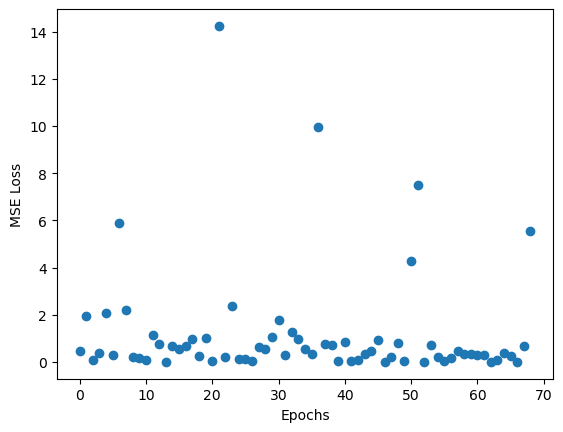

In [47]:
fig, ax = plt.subplots()

ax.scatter(np.arange(len(X_test_tensor)), total_test_loss)
ax.set_xlabel("Epochs")
ax.set_ylabel("MSE Loss")